<a href="https://colab.research.google.com/github/ahmed-u-khan/stock_analysis/blob/main/expected_price_changes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING AND SETTING UP CONFIGS

In [4]:
# prompt: how do i import data from bigquery?

from google.colab import auth
auth.authenticate_user()
print('Authenticated')

import pandas as pd
import pandas_gbq
import matplotlib.pyplot as plt

pd.set_option('display.width', 400)

project_id = 'first-project-262802' # Replace with your project ID
dataset_id = 'stock_analysis' # Replace with your dataset ID
table_id = 'stock_analysis' # Replace with your table ID

Authenticated


**FNGU**

Downloading: 100%|██████████|
  symbol        date  price_diff_of_close_to_close_of_previous_day  price_diff_pct_of_close_to_close_of_previous_day  price_diff_pct_of_close_to_close_of_previous_day_rounded
0   FNGU  2018-01-23                                           NaN                                               NaN                                                NaN       
1   FNGU  2018-01-24                                     -0.110001                                             -0.21                                               -0.2       
2   FNGU  2018-01-25                                     -0.039997                                             -0.07                                               -0.1       
3   FNGU  2018-01-26                                      4.410000                                              8.26                                                8.3       
4   FNGU  2018-01-29                                      0.989998                             

array([[<Axes: title={'center': 'price_diff_pct_of_close_to_close_of_previous_day'}>]],
      dtype=object)

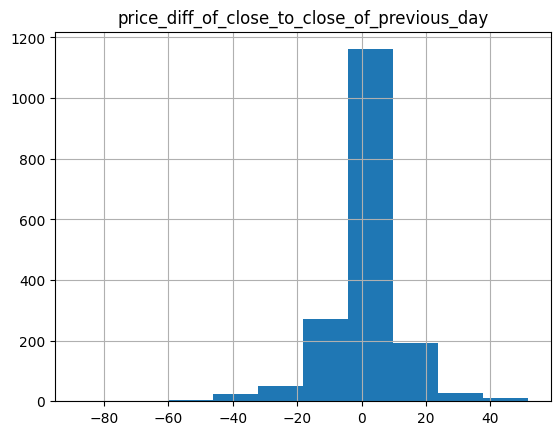

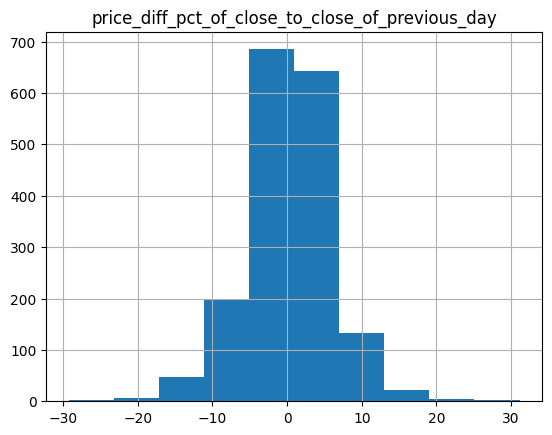

In [7]:
symbol_one = 'FNGU'

query = f"""

    SELECT

      symbol
      , date
      -- , price_diff_of_high_to_close_of_previous_day
      -- , price_diff_pct_of_high_to_close_of_previous_day
      -- , price_diff_of_low_to_close_of_previous_day
      -- , price_diff_pct_of_low_to_close_of_previous_day
      , price_diff_of_close_to_close_of_previous_day
      , price_diff_pct_of_close_to_close_of_previous_day
      , round(price_diff_pct_of_close_to_close_of_previous_day,1) as price_diff_pct_of_close_to_close_of_previous_day_rounded

    FROM `{project_id}.{dataset_id}.{table_id}`
    WHERE symbol = '{symbol_one}'

    ORDER BY symbol, date

"""

# df = pd.read_gbq(query, project_id=project_id) ### pd.read_gbq is about to be depracated
df = pandas_gbq.read_gbq(query, project_id=project_id)

print(df.head(10))
# print(df.to_string())

# plt.hist(x)
# plt.show()
df.hist(column='price_diff_of_close_to_close_of_previous_day')

df.hist(column='price_diff_pct_of_close_to_close_of_previous_day_rounded')
